In [5]:
import numpy as np

np.random.seed(0)
X = np.random.randn(1000, 2)
y = np.sum(X, axis=1) > 1
y = y.astype(int)


In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [7]:
def cost_function(X, y, weights):
    z = np.dot(X, weights)
    y_hat = sigmoid(z)
    loss = y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)
    cost = -np.mean(loss)
    return cost


In [8]:
def gradient_descent(X, y, weights, learning_rate, num_iterations):
    m = len(y)
    for i in range(num_iterations):
        z = np.dot(X, weights)
        y_hat = sigmoid(z)
        error = y_hat - y
        gradient = np.dot(X.T, error) / m
        weights -= learning_rate * gradient
        cost = cost_function(X, y, weights)
        if i % 100 == 0:
            print(f"Cost at iteration {i}: {cost}")
    return weights


In [9]:
# Add a column of ones for the intercept term
X = np.hstack((np.ones((len(X), 1)), X))

# Initialize weights to zero
weights = np.zeros(X.shape[1])

# Train the model
learning_rate = 0.1
num_iterations = 1000
weights = gradient_descent(X, y, weights, learning_rate, num_iterations)

print("Weights:", weights)


Cost at iteration 0: 0.6769990218987177
Cost at iteration 100: 0.27464379965304203
Cost at iteration 200: 0.2113939055765461
Cost at iteration 300: 0.18154645074828296
Cost at iteration 400: 0.16309645795709662
Cost at iteration 500: 0.15016239624209896
Cost at iteration 600: 0.14040535725951053
Cost at iteration 700: 0.1326823298328866
Cost at iteration 800: 0.1263578923657707
Cost at iteration 900: 0.1210459776961989
Weights: [-3.20559743  2.98235675  2.98640501]


In [10]:
# Generate new data
X_test = np.random.randn(10, 2)

# Add a column of ones for the intercept term
X_test = np.hstack((np.ones((len(X_test), 1)), X_test))

# Make predictions
predictions = np.round(sigmoid(np.dot(X_test, weights)))

print("Predictions:", predictions)


Predictions: [0. 0. 0. 0. 1. 0. 1. 0. 1. 0.]


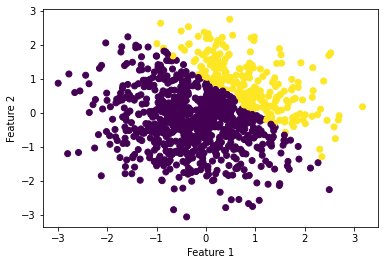

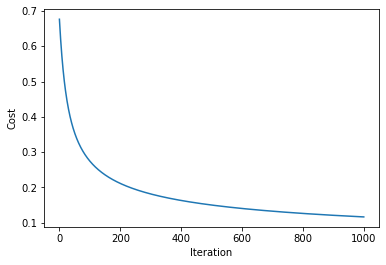

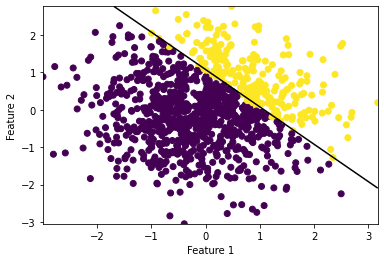

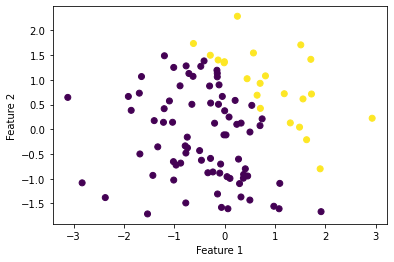

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(X, y, weights):
    z = np.dot(X, weights)
    y_hat = sigmoid(z)
    loss = y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)
    cost = -np.mean(loss)
    return cost

def gradient_descent(X, y, weights, learning_rate, num_iterations):
    m = len(y)
    costs = []
    for i in range(num_iterations):
        z = np.dot(X, weights)
        y_hat = sigmoid(z)
        error = y_hat - y
        gradient = np.dot(X.T, error) / m
        weights -= learning_rate * gradient
        cost = cost_function(X, y, weights)
        costs.append(cost)
    return weights, costs

np.random.seed(0)
X = np.random.randn(1000, 2)
y = np.sum(X, axis=1) > 1
y = y.astype(int)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Add a column of ones for the intercept term
X = np.hstack((np.ones((len(X), 1)), X))

# Initialize weights to zero
weights = np.zeros(X.shape[1])

# Train the model
learning_rate = 0.1
num_iterations = 1000
weights, costs = gradient_descent(X, y, weights, learning_rate, num_iterations)

plt.plot(costs)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

plt.scatter(X[:, 1], X[:, 2], c=y)
x1_min, x1_max = X[:, 1].min(), X[:, 1].max(),
x2_min, x2_max = X[:, 2].min(), X[:, 2].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = sigmoid(np.dot(np.hstack((np.ones((len(grid), 1)), grid)), weights))
probs = probs.reshape(xx1.shape)
plt.contour(xx1, xx2, probs, levels=[0.5], cmap="gray")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Generate new data
X_test = np.random.randn(100, 2)

# Add a column of ones for the intercept term
X_test = np.hstack((np.ones((len(X_test), 1)), X_test))

# Make predictions
y_hat = sigmoid(np.dot(X_test, weights))
y_pred = (y_hat > 0.5).astype(int)

plt.scatter(X_test[:, 1], X_test[:, 2], c=y_pred)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
